<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

# TP5 - Signal périodique et production d'un son

<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle()

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib

<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>Buzzer</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import pi,cos
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

# Sujet

<p>Le TP est constitué de deux parties, une sur python pour le tracé et l'étude de fonctions périodiques et la deuxième sur arduino pour la production d'un son à l'aide d'un buzzer.</p>

<h2>Partie 1 - Fonctions périodiques</h2>


Ecrire une fonction cos
tracer
Deux fonction cos avec période différente sur un même graphique
Deux fonctions cos avec amplitude différente sur un même graphique
propagation
Ecrire une fonction rectangle (0, 5V)

<b>1°)</b> Ecrire ci-dessous <b style="color:red;">en python</b> une fonction <b>cosinus</b> qui prend comme arguments trois float: <b>le temps t, l'amplitude A et la période T</b> et qui renvoie  la valeur de $A \times cos(2 \pi \frac{t}{T})$. Votre fonction pourra utiliser la fonction cos et la variable pi déjà en mémoire.
<p>Vous pourrez utiliser la <a href="./methode_modele.ipynb">fiche méthode</a> fournie.</p>

In [7]:
hide_toggle(texte="Correction")

In [8]:
def cosinus(t, A, T):
    return A*cos(2*pi*t/T)

<b>2°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire <b>une liste temps</b> de 1001 valeurs de t entre 0 et 10 ms, et <b>une liste y</b> de valeurs de la fonction précédente pour A = 3.5 et T = 0.002 pour les temps précédents.

In [9]:
hide_toggle(texte="Correction")

In [10]:
temps = []
y = []
for i in range(1001):
    temps.append(0.010*i/1000)
    y.append(cosinus(t=temps[i],A=3.5,T=0.002))

<b>3°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la fonction précédente pour A = 3.5 et T = 0.002 sur 5 périodes. Vous utiliserez les listes construites à la question 2.
<p>Vous pourrez utiliser la <a href="./methode_courbe.ipynb">fiche méthode</a> fournie.</p>

In [11]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


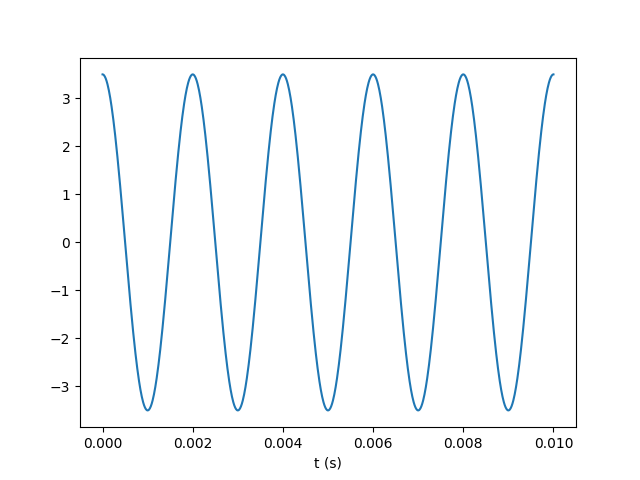

In [12]:
plt.figure("Tracer une fonction périodique")
plt.plot(temps,y)
plt.xlabel("t (s)")
plt.show()

<b>4°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la fonction précédente pour A = 3.5 et T = 0.002 et pour A = 3.5 et T = 0.003 sur un même graphique pour t allant de 0 à 10 ms. Vous prendrez soin d'identifier les deux courbes sur le graphique.

In [13]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


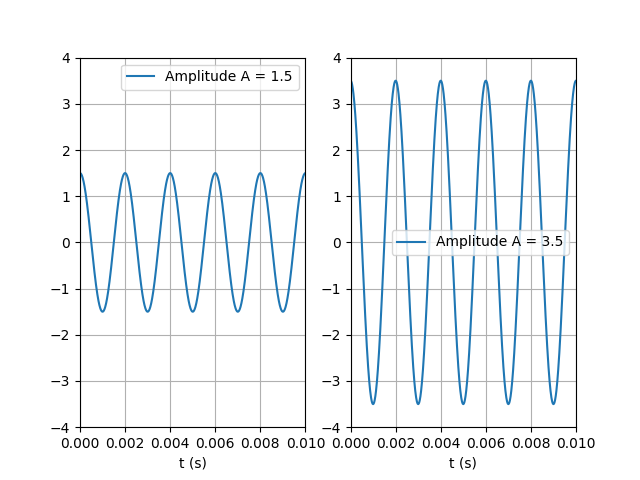

In [14]:
#Construire les listes
temps = []
y1 = []
y2 = []
for i in range(1001):
    temps.append(i*0.002*5/1000)
    y1.append(cosinus(t=temps[i],A=3.5,T=0.002))
    y2.append(cosinus(t=temps[i],A=3.5,T=0.003))
    
#Construire le graphique
plt.figure("Question 4°)")
plt.plot(temps,y1,label="Période T = 2 ms")
plt.plot(temps,y2,label="Période T = 3 ms")
plt.legend()
plt.xlabel("t (s)")
plt.grid()
plt.show()

<b>5°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la fonction précédente pour A = 1.5 et T = 0.002 et pour A = 3.5 et T = 0.002 sur <b>deux graphiques côte à côte à la même échelle</b> pour t allant de 0 à 10 ms.

In [15]:
hide_toggle(texte="Correction")

In [16]:
#Construire les listes
temps = []
y1 = []
y2 = []
for i in range(1001):
    temps.append(i*0.002*5/1000)
    y1.append(cosinus(t=temps[i],A=1.5,T=0.002))
    y2.append(cosinus(t=temps[i],A=3.5,T=0.002))
    
#Construire le graphique
plt.figure("Question 4°)")
plt.subplot2grid((1,2),(0,0))
plt.plot(temps,y1,label="Amplitude A = 1.5")
plt.legend()
plt.xlabel("t (s)")
plt.ylim([-4.,4.])
plt.xlim([0.,0.01])
plt.grid()

plt.subplot2grid((1,2),(0,1))
plt.plot(temps,y2,label="Amplitude A = 3.5")
plt.legend()
plt.xlabel("t (s)")
plt.ylim([-4.,4.])
plt.xlim([0.,0.01])
plt.grid()

plt.show()

On donne la fonction suivante permettant de représenter une onde. Elle nécessite une valeur de position et de temps ainsi que les caractéristiques de l'onde, célérité et période.

In [17]:
def onde(x,t,c,T):
    return cos(2*pi*(t/T-x/(c*T)))

<b>6°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de représenter la fonction <b>onde</b> pour x allant de 0 à 2m. On construira 5 courbes sur une même figure, pour t = 0., 0.5, 1.0, 1.5, et 2.0 ms.

In [18]:
hide_toggle(texte="Correction")

<IPython.core.display.Javascript object>


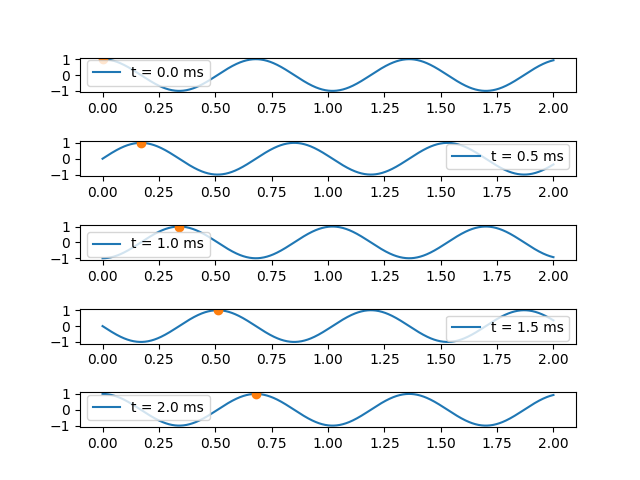

In [19]:
t = [2e-3*i/4 for i in range(5)]
x = [2.*i/1000 for i in range(1001)]

plt.figure("Question 6°)")
for i in range(len(t)):
    y3 = []
    y3 = [onde(val,t[i],340.,0.002) for val in x]
    plt.subplot2grid((9,1),(2*i,0))
    plt.plot(x,y3,label="t = {:.1f} ms".format(t[i]*1000))
    plt.plot([340*t[i]],[onde(340*t[i],t[i],340.,0.002)],"o")
    plt.legend()
plt.show()

<b>7°)</b> Ecrire ci-dessous <b style="color:red;">en python</b> une fonction <b>creneau</b> qui prend comme arguments deux float: <b>le temps t, et la période T</b> et qui renvoie 5. pendant la première demi période et 0. pendant la demi période suivante. <b>On remarquera que t%T renvoie une valeur entre 0 et T, T exclu.</b>

In [20]:
hide_toggle(texte="Correction")

In [21]:
def creneau(t, T):
    if t%T<T/2:
        return 5.
    else:
        return 0.

<b>8°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire une représentation graphique de la fonction précédente pour T = 0.002 et t allant de 0 à 10 ms.

In [22]:
hide_toggle("Correction")

<IPython.core.display.Javascript object>


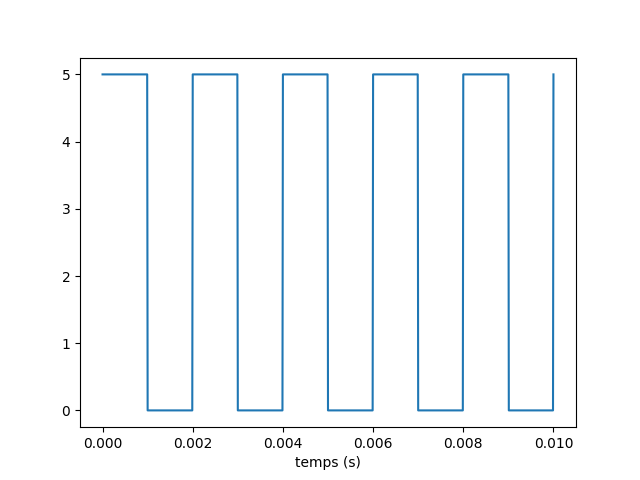

In [23]:
temps2 = [0.010*i/1000 for i in range(1001)]
y2 = [creneau(val,0.002) for val in temps2]

plt.figure("Creneau")
plt.plot(temps2,y2)
plt.xlabel("temps (s)")
plt.show()

<h2>Partie 2 - Production de son à l'aide d'un microcontrôleur</h2>

<p>Pour étudier la vitesse des ultrasons puis effectuer des mesures de distance, nous allons utiliser un émetteur récepteur d’ultrasons HC-SR04. Il sera relié à une carte Arduino suivant le <b>montage de la figure 1.</b> Réalisez ce montage sans relier la carte Arduino à l’ordinateur.</p>

<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP5_figure1.png"></center></p>


# Fin de la partie rédigée: Modifier la suite

<b>5°)</b> Ouvrez le programme <a href="./US2.ino" target="_blank">US2.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p>Qu'apporte ce programme par rapport à US.ino ?</p>

<b>9°)</b> Modifier encore ce programme pour qu'il affiche une valeur après avoir réalisé une moyenne sur 16 mesures. <b>Téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>. Pour chaque mesure, comparez la valeur donnée par le capteur et celui mesuré avec un mètre ruban.